In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [79]:
NUM_OF_RECORDS_PER_SAMPLE = 5
def combine_rows(df):
    cols = df.columns
    df = df.groupby(df.index//NUM_OF_RECORDS_PER_SAMPLE)[cols].apply(lambda x: pd.DataFrame(x.values)).unstack().reset_index()
    df.columns = df.columns.droplevel()
    new_cols = ["index"]
    for col in cols:
        for i in range(NUM_OF_RECORDS_PER_SAMPLE):
            new_cols.append(col+str(i)) 
        
    df.columns = new_cols
    not_important_features = ["index"]
    features = ["Time","Frame ID","state_type","name","Hand Type","# hands"]
    for f in features:
        for s in new_cols:
            if f in s:
                df[f] = df[s]
                not_important_features.append(s)
    df = df.drop(not_important_features,axis=1)
    numeric_featers = [x for x in df.columns if x not in features]
    df[numeric_featers] = df[numeric_featers].apply(pd.to_numeric)
    return df

In [80]:
def get_state_type(filename):
    state_type = 3
    if 'Spontan' in filename:
        state_type = 1
    elif 'Sync' in filename:
        state_type = 2
    return state_type

def handle_right_hand_file(df):
    alone_right = pd.read_csv("HandRight.csv",index_col=None, header=0)
    alone_right.rename(columns=lambda x: x.strip(), inplace=True)
    alone_right["state_type"] = 3
    alone_right["name"] = ""
    #df = pd.concat([df,alone_right])
    return df

In [88]:
SKIP_MIN_NUM = 7
def construct_datasets(path_type):
    all_files = glob.glob(path_type)
    li = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        df.rename(columns=lambda x: x.strip(), inplace=True)
        
        df['state_type'] = get_state_type(filename)
        df['name'] = filename.split("\\")[1]
        start_time = df["Time"].min()
        df = df[df["Time"]>start_time+SKIP_MIN_NUM]
        df = combine_rows(df)
        df["Time"] = df["Time"].astype("float")
        df = df[df['state_type'].notna()]
        df["state_type"] = df["state_type"].astype("int")
        li.append(df)
        
    df = pd.concat(li, axis=0, ignore_index=True)
    df = handle_right_hand_file(df)
    
    return df
df = construct_datasets("Training/*/*.csv")
df

,Position X0,Position X1,Position X2,Position X3,Position X4,Position Y0,Position Y1,Position Y2,Position Y3,Position Y4,...,Pinch Strength1,Pinch Strength2,Pinch Strength3,Pinch Strength4,Time,Frame ID,state_type,name,Hand Type,# hands
0,-110.42230,137.58480,-110.69090,138.65750,-111.44740,231.4766,206.9182,233.3635,210.6163,236.8768,...,0.0,0.0,0.0,0.0,71.48033,98080,1,Evyatar Cohen,left,2
1,139.30040,-112.54570,139.50180,-113.14660,139.50440,214.3510,241.5983,218.3653,245.3283,222.8770,...,0.0,0.0,0.0,0.0,71.51359,98084,1,Evyatar Cohen,right,2
2,-113.91830,140.34820,-115.02970,142.05480,-115.33540,249.2464,227.4296,252.5950,233.2705,256.1827,...,0.0,0.0,0.0,0.0,71.56316,98090,1,Evyatar Cohen,left,2
3,144.09590,-114.90850,145.90060,-115.70580,148.04590,239.4014,259.3652,243.7470,261.6903,247.7996,...,0.0,0.0,0.0,0.0,71.59629,98094,1,Evyatar Cohen,right,2
4,-116.08190,148.85690,-117.53250,150.12540,-118.87450,262.2935,249.4935,265.2766,252.2394,269.4034,...,0.0,0.0,0.0,0.0,71.64600,98099,1,Evyatar Cohen,left,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60027,91.31541,-74.79743,92.07137,-75.16435,92.72672,182.4873,153.2910,184.3723,154.5737,185.6738,...,0.0,0.0,0.0,0.0,855.99660,67290,2,Yoel Raz,right,2
60028,-75.83507,93.94934,-76.47509,94.50477,-76.48546,159.3587,190.0024,163.2591,193.3147,165.9167,...,0.0,0.0,0.0,0.0,856.09640,67297,2,Yoel Raz,left,2
60029,94.64355,-76.36160,95.38348,-76.51263,96.97344,196.8384,167.8417,199.8574,171.0094,203.6819,...,0.0,0.0,0.0,0.0,856.16330,67302,2,Yoel Raz,right,2
60030,-77.62601,97.75611,-78.43058,98.93275,-79.84506,173.7391,205.9629,176.0170,208.3153,180.2403,...,0.0,0.0,0.0,0.0,856.26310,67309,2,Yoel Raz,left,2


# Labels


| Label | Description |
| --- | --- |
| 1 | Spontan |
| 2 | Sync |
| 3 | Alone |

In [89]:
df.sort_values('Time')
df['Time'].value_counts()

333.60600    2
737.55660    2
293.18770    2
347.99260    2
347.21410    2
            ..
70.95866     1
444.25310    1
407.09910    1
404.58470    1
388.23350    1
Name: Time, Length: 59753, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60032 entries, 0 to 60031
Data columns (total 96 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position X0      60032 non-null  float64
 1   Position X1      60032 non-null  float64
 2   Position X2      60032 non-null  float64
 3   Position X3      60032 non-null  float64
 4   Position X4      60032 non-null  float64
 5   Position Y0      60032 non-null  float64
 6   Position Y1      60032 non-null  float64
 7   Position Y2      60032 non-null  float64
 8   Position Y3      60032 non-null  float64
 9   Position Y4      60032 non-null  float64
 10  Position Z0      60032 non-null  float64
 11  Position Z1      60032 non-null  float64
 12  Position Z2      60032 non-null  float64
 13  Position Z3      60032 non-null  float64
 14  Position Z4      60032 non-null  float64
 15  Velocity X0      60032 non-null  float64
 16  Velocity X1      60032 non-null  float64
 17  Velocity X2 

In [ ]:
import matplotlib.dates as matdates

def plot_position_over_time(position):
    print(position,"over time")
    for name in df["name"].dropna().unique()[:1]:#you can remove the [] to print for all persons
        print("plot position of",name)
        fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(20,10))
        for state_type in range(1,4):
            x_pos_over_timer = df[(df["name"]==name) & (df["state_type"]==state_type)][["Time",position,"Hand Type"]]
            left_x_pos_over_timer = x_pos_over_timer[x_pos_over_timer["Hand Type"]=="left"]
            right_x_pos_over_timer = x_pos_over_timer[x_pos_over_timer["Hand Type"]=="right"]
            ax[state_type-1][0].plot(left_x_pos_over_timer["Time"],left_x_pos_over_timer[position])
            ax[state_type-1][0].plot(right_x_pos_over_timer["Time"],right_x_pos_over_timer[position])
            ax[state_type-1][1].plot(left_x_pos_over_timer["Time"],left_x_pos_over_timer[position])
            ax[state_type-1][2].plot(right_x_pos_over_timer["Time"],right_x_pos_over_timer[position],"m")
        plt.show()

In [91]:
print(len(df[pd.isnull(df).any(axis=1)]))

0


# Models

In [123]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split
import warnings
from sklearn.utils import shuffle
#warnings.filterwarnings('ignore')

In [95]:
df = df.sample(frac=1).reset_index(drop=True)
df

,Position X0,Position X1,Position X2,Position X3,Position X4,Position Y0,Position Y1,Position Y2,Position Y3,Position Y4,...,Pinch Strength1,Pinch Strength2,Pinch Strength3,Pinch Strength4,Time,Frame ID,state_type,name,Hand Type,# hands
0,133.13380,-82.56790,135.62430,-83.49555,137.53610,222.9890,244.3964,219.4012,245.8393,215.5525,...,0.000000,0.0000,0.000000,0.000000,453.9366,142146,2,Evyatar Cohen,right,2
1,113.81810,-81.33206,114.49030,-82.13968,115.31490,360.1650,148.3854,365.5429,148.5749,370.3004,...,0.000000,0.0000,0.000000,0.000000,307.5667,36173,1,Revital Marbel,right,2
2,160.03410,-87.90346,161.37820,-88.01790,161.89610,222.2769,110.5479,224.7533,110.7877,225.8908,...,0.259247,0.0000,0.287379,0.000000,446.5493,52477,1,Nofar Social_Nuero,right,2
3,140.62330,-130.42830,140.47940,-130.73230,140.34420,256.2990,170.6870,256.1622,170.6946,255.6423,...,0.000000,1.0000,0.000000,0.924347,443.4253,51659,1,Orya Kalmanovitz,right,2
4,-111.83820,138.34630,-110.53510,136.65380,-108.08690,210.5746,145.9078,212.1164,139.0802,211.1744,...,0.000000,0.0000,0.000000,0.000000,418.3020,50779,1,Shahar Terner,left,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60027,-57.10731,-58.60594,-61.42443,-64.30142,-67.63943,216.3370,215.8098,217.9709,217.7049,216.9996,...,0.000000,0.0000,0.000000,0.000000,481.6075,56203,3,Revital Marbel,left,1
60028,141.49430,-182.55230,137.72890,-179.75180,133.45380,278.3275,232.9303,276.2278,230.3043,273.4109,...,0.000000,0.0000,0.000000,0.000000,437.8816,50541,2,Oriya Social_Nuero,right,2
60029,-112.48170,-112.64780,-112.83790,-113.10530,-113.38430,207.5312,206.8615,206.0431,205.4353,204.6613,...,0.828516,1.0000,1.000000,1.000000,588.2808,70363,3,Shahar Terner,left,1
60030,-96.39586,159.07650,-97.23116,159.27450,-98.15959,155.9186,207.1519,157.0057,199.9982,158.3417,...,0.000000,0.9241,0.000000,0.993917,166.8687,19836,1,Orya Kalmanovitz,left,2


In [114]:
y = df["state_type"]
print(y.value_counts())
X = df.drop(["Frame ID","state_type","name","Hand Type","# hands"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

1    24385
2    24195
3    11452
Name: state_type, dtype: int64


In [97]:
knn = KNeighborsClassifier(n_neighbors=5,p=1,weights="distance")
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96      8041
           2       0.95      0.97      0.96      8016
           3       0.99      1.00      1.00      3754

    accuracy                           0.97     19811
   macro avg       0.97      0.97      0.97     19811
weighted avg       0.97      0.97      0.97     19811



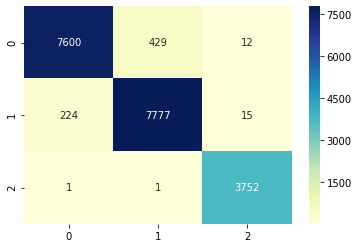

In [101]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), cmap="YlGnBu",annot=True, fmt="d")

In [61]:
param_list = [("eta", 0.08), ("max_depth", 6), ("subsample", 0.8), ("colsample_bytree", 0.8), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("alpha", 8), ("lambda", 2), ("num_class", 10)]
n_rounds = 600
early_stopping = 50
    
d_train = xgb.DMatrix(X_train, label=y_train)
d_val = xgb.DMatrix(X_test, label=y_test)
eval_list = [(d_train, "train"), (d_val, "validation")]
bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

[0]	train-merror:0.10785	validation-merror:0.11670
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[1]	train-merror:0.09672	validation-merror:0.10681
[2]	train-merror:0.09413	validation-merror:0.10211
[3]	train-merror:0.08737	validation-merror:0.09495
[4]	train-merror:0.08302	validation-merror:0.09232
[5]	train-merror:0.08140	validation-merror:0.08934
[6]	train-merror:0.07847	validation-merror:0.08536
[7]	train-merror:0.07717	validation-merror:0.08399
[8]	train-merror:0.07494	validation-merror:0.08172
[9]	train-merror:0.07347	validation-merror:0.07975
[10]	train-merror:0.07158	validation-merror:0.07804
[11]	train-merror:0.06959	validation-merror:0.07693
[12]	train-merror:0.06830	validation-merror:0.07491
[13]	train-merror:0.06698	validation-merror:0.07370
[14]	train-merror:0.06559	validation-merror:0.07259
[15]	train-merror:0.06444	validation-merror:0.07132
[16]	train-merror:0

[154]	train-merror:0.00485	validation-merror:0.01095
[155]	train-merror:0.00492	validation-merror:0.01070
[156]	train-merror:0.00480	validation-merror:0.01080
[157]	train-merror:0.00475	validation-merror:0.01075
[158]	train-merror:0.00477	validation-merror:0.01090
[159]	train-merror:0.00475	validation-merror:0.01085
[160]	train-merror:0.00458	validation-merror:0.01075
[161]	train-merror:0.00447	validation-merror:0.01070
[162]	train-merror:0.00435	validation-merror:0.01040
[163]	train-merror:0.00428	validation-merror:0.01025
[164]	train-merror:0.00435	validation-merror:0.01020
[165]	train-merror:0.00423	validation-merror:0.01005
[166]	train-merror:0.00423	validation-merror:0.01015
[167]	train-merror:0.00418	validation-merror:0.01005
[168]	train-merror:0.00420	validation-merror:0.00999
[169]	train-merror:0.00420	validation-merror:0.01005
[170]	train-merror:0.00415	validation-merror:0.00999
[171]	train-merror:0.00413	validation-merror:0.00984
[172]	train-merror:0.00410	validation-merror:0

[309]	train-merror:0.00104	validation-merror:0.00626
[310]	train-merror:0.00104	validation-merror:0.00626
[311]	train-merror:0.00100	validation-merror:0.00626
[312]	train-merror:0.00100	validation-merror:0.00621
[313]	train-merror:0.00097	validation-merror:0.00616
[314]	train-merror:0.00097	validation-merror:0.00626
[315]	train-merror:0.00094	validation-merror:0.00621
[316]	train-merror:0.00092	validation-merror:0.00626
[317]	train-merror:0.00089	validation-merror:0.00621
[318]	train-merror:0.00089	validation-merror:0.00621
[319]	train-merror:0.00089	validation-merror:0.00621
[320]	train-merror:0.00087	validation-merror:0.00621
[321]	train-merror:0.00085	validation-merror:0.00621
[322]	train-merror:0.00085	validation-merror:0.00616
[323]	train-merror:0.00080	validation-merror:0.00616
[324]	train-merror:0.00080	validation-merror:0.00616
[325]	train-merror:0.00080	validation-merror:0.00611
[326]	train-merror:0.00080	validation-merror:0.00611
[327]	train-merror:0.00080	validation-merror:0

[464]	train-merror:0.00057	validation-merror:0.00555
[465]	train-merror:0.00057	validation-merror:0.00555
[466]	train-merror:0.00055	validation-merror:0.00550
[467]	train-merror:0.00052	validation-merror:0.00550
[468]	train-merror:0.00052	validation-merror:0.00555
[469]	train-merror:0.00052	validation-merror:0.00540
[470]	train-merror:0.00050	validation-merror:0.00540
[471]	train-merror:0.00050	validation-merror:0.00540
[472]	train-merror:0.00047	validation-merror:0.00545
[473]	train-merror:0.00050	validation-merror:0.00545
[474]	train-merror:0.00047	validation-merror:0.00545
[475]	train-merror:0.00050	validation-merror:0.00545
[476]	train-merror:0.00050	validation-merror:0.00545
[477]	train-merror:0.00047	validation-merror:0.00545
[478]	train-merror:0.00047	validation-merror:0.00545
[479]	train-merror:0.00050	validation-merror:0.00545
[480]	train-merror:0.00050	validation-merror:0.00545
[481]	train-merror:0.00050	validation-merror:0.00545
[482]	train-merror:0.00050	validation-merror:0

In [63]:
d_test = xgb.DMatrix(data=X_test)
y_pred = bst.predict(d_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      7941
           2       1.00      0.99      0.99      8114
           3       0.99      1.00      1.00      3756

    accuracy                           0.99     19811
   macro avg       0.99      1.00      0.99     19811
weighted avg       0.99      0.99      0.99     19811



In [131]:
model = Sequential()

model.add(Dense(3, input_dim=len(X_train.columns), activation='relu'))#hidden layer
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))#output layer, Softmax - more than two categories,(Sigmoid - two categories)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss(multi-categories=categorical_crossentropy, two-categories=binary_crossentropy),optimizer(adam or rmsprop)

In [132]:
model.fit(X_train, pd.get_dummies(y_train), epochs=10, validation_split=0.1)
_, test_acc = model.evaluate(X_test, pd.get_dummies(y_test))
print(test_acc)

Train on 36198 samples, validate on 4023 samples
Epoch 1/10
36198/36198 [==============================] - 2s 53us/step - loss: 0.9739 - accuracy: 0.6237 - val_loss: 0.6047 - val_accuracy: 0.7112
Epoch 2/10
36198/36198 [==============================] - 2s 42us/step - loss: 0.5451 - accuracy: 0.7453 - val_loss: 0.5319 - val_accuracy: 0.7606
Epoch 3/10
36198/36198 [==============================] - 1s 41us/step - loss: 0.4980 - accuracy: 0.7701 - val_loss: 0.4843 - val_accuracy: 0.7835
Epoch 4/10
36198/36198 [==============================] - 2s 45us/step - loss: 0.4850 - accuracy: 0.7785 - val_loss: 0.4903 - val_accuracy: 0.7743
Epoch 5/10
36198/36198 [==============================] - 2s 49us/step - loss: 0.4735 - accuracy: 0.7855 - val_loss: 0.4968 - val_accuracy: 0.7783
Epoch 6/10
36198/36198 [==============================] - 2s 41us/step - loss: 0.4618 - accuracy: 0.7924 - val_loss: 0.4762 - val_accuracy: 0.7902
Epoch 7/10
36198/36198 [==============================] - 1s 41us/ste

# Validation

In [102]:
test_df = construct_datasets("Validation/*/*.csv")
test_df = test_df.dropna()
y = test_df["state_type"]
X = test_df.drop(["Frame ID","state_type","name","Hand Type","# hands"], axis=1)

In [103]:
scores = cross_val_score(knn, X, y, cv=5)
print(scores.mean())

0.8816487848986263
